# Open Data Example #1: City of Chicago Salaries

_Source for Data Set:_ City of Chicago Department of Human Resources

_URL for Data Set:_ https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w

_Description of Data Set:_ "This dataset is a listing of all current City of Chicago employees, complete with full names, departments, positions, and annual salaries. For hourly employees the annual salary is estimated." (Description written by City of Chicago) 

_File Format for Data Set:_ CSV file (Comma Separated Values)

_Age of Data Set:_ Last updated January 30, 2018

### Import CSV File

In [1]:
# Import pandas module
import pandas as pd

# Read in the csv file (comma separated values)
salary_DF = pd.read_csv("Salaries 2019.csv")

# Print the last three entries of the file
    # The last line of a cell will print automatically!
    # Can sometimes display data differently
salary_DF[-3:]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
32809,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,$87006.00,NaN
32810,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,$93354.00,NaN
32811,"ZYSKOWSKI, DARIUSZ",CHIEF DATA BASE ANALYST,DoIT,F,Salary,NaN,$115932.00,NaN


Sometimes, the last entry (or the last few entries) in a dataset may be erroneous. Use code similar to below to eliminate them.

salary_DF = salary_DF.drop(salary_DF.index[-1])

### Question: How many employees are paid by the City of Chicago?

In [2]:
# Print the length of the data fram
len(salary_DF)

32812

### Modify Data: Create a List of Salaries

In [3]:
# Store all values from the "Annual Salary" column
salary_list = salary_DF["Annual Salary"]

# Print the first 3 entries
salary_list[:3]

0    $101442.00
1     $94122.00
2    $101592.00
Name: Annual Salary, dtype: object

### Modify Data to be Usable

Step 1: Clean data by deleting dollar signs, '$', from the salaries and replace any empty strings with a salary of '0.00' dollars per year.

Step 2: Create a list with only salaries, converted from strings to floating point numbers. For example, the string '84450.0' becomes the floating point number 84450.0.

In [4]:
# Delete '$'
salary_list = salary_list.str.replace("$","")

# Convert to floating point number
    # Empty cells --> 0.00
salary_list = salary_list.astype(float)

# Print the last 4 entries
salary_list[-4:]

32808     48078.0
32809     87006.0
32810     93354.0
32811    115932.0
Name: Annual Salary, dtype: float64

It might come in handy later to have our salaries as floating point numbers. Let's replace the old column in our dataframe (string data) and replace it with our new one (floating point numbers):

In [5]:
# Delete the data in "Annual Salary" column
del salary_DF["Annual Salary"]

# Replace with new data
salary_DF["Annual Salary"] = salary_list

# Print first 10 entries
salary_DF[:10]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,NaN,101442.0
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,NaN,94122.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,NaN,101592.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,NaN,110064.0
4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,$36.18,NaN
5,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,$19.86,NaN
6,"ABBASI, CHRISTOPHER",STAFF ASST TO THE ALDERMAN,CITY COUNCIL,F,Salary,NaN,NaN,50436.0
7,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,$46.10,NaN
8,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,$35.60,NaN
9,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,Salary,NaN,NaN,103350.0


### Modify Data: Convert to a Numpy Number Array

In [6]:
# Import numpy
import numpy as np

# Convert data to a numpy array
salary_array = np.array(salary_list)

# Print the last 30 values
salary_array[-30:]

array([ 84054.,  68616.,  84054.,  90024.,     nan,  92274., 114324.,
        76266.,     nan,  76896.,  96060.,     nan,  89076.,  76266.,
        76932.,     nan,     nan,  90024., 114324.,  72510.,  84054.,
           nan,     nan,  48078.,  72510.,  72510.,  48078.,  87006.,
        93354., 115932.])

Look closely at this output, and you'll spot a problem: 

Some of our values are listed as "nan" or "not a number." If we are going to do some mathematical calculations with this data, we're going to need to clean the data by removing all instances of "nan." 

_Note: There may be several reasons why the dataset contains "nan" values. In some cases, an employee's salary data might be missing, there may have been a data entry error, an employee may have gone unpaid for a year because of an extended leave, or the employee may be working on a volunteer basis. Since there's no way to know how to interpret these values, it is best for us to do some data cleaning and remove them._ 

In [7]:
# Import numpy as np
import numpy as np

# Eliminate the NaN entries
    # the ~ symbol is interpreted by numpy as "not"
salary_array = salary_array[~np.isnan(salary_array)]

# Print the last 30 entries
salary_array[-30:]

array([ 76266.,  86748.,  97386.,  56304.,  87006.,  83136.,  87006.,
        84054.,  68616.,  84054.,  90024.,  92274., 114324.,  76266.,
        76896.,  96060.,  89076.,  76266.,  76932.,  90024., 114324.,
        72510.,  84054.,  48078.,  72510.,  72510.,  48078.,  87006.,
        93354., 115932.])

### Question: What is the average salary for city employees?

In [8]:
# Calculate the average
average = np.average(salary_array)
average

87313.95918720691

### Question: What is the median salary for city employees?

In [9]:
# Find the median value
median = np.median(salary_array)
median

90024.0

### Question: What is the number of city employees?

In [10]:
# Find the size length of the array
len(salary_array)

24951

### Question: What is the standard deviation of city employee salaries?

In [11]:
# Find the standard deviation
standard_dev = np.std(salary_array)
standard_dev

20780.299002070202

### Question: What is the highest salary among city employees?

In [12]:
# Find the max value
highest = np.amax(salary_array)
highest

300000.0

### Question: The highest paid employee of the City of Chicago makes $300,000 a year. Who is it?

In [13]:
# Sort the array in ascending order
sorted_DF = salary_DF.sort_values("Annual Salary", ascending = 0)

# Print first entry only
sorted_DF[:1]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
8315,"EVANS, GINGER S",COMMISSIONER OF AVIATION,AVIATION,F,Salary,NaN,NaN,300000.0


### Question: Who earns the top 10 salaries in the City of Chicago?

In [14]:
# Print the first 10 entries of the sorted array
sorted_DF[:10]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
8315,"EVANS, GINGER S",COMMISSIONER OF AVIATION,AVIATION,F,Salary,NaN,NaN,300000.0
13985,"JOHNSON, EDDIE T",SUPERINTENDENT OF POLICE,POLICE,F,Salary,NaN,NaN,260004.0
8083,"EMANUEL, RAHM",MAYOR,MAYOR'S OFFICE,F,Salary,NaN,NaN,216210.0
26099,"SANTIAGO, JOSE A",FIRE COMMISSIONER,FIRE,F,Salary,NaN,NaN,202728.0
9075,"FORD II, RICHARD C",FIRST DEPUTY FIRE COMMISSIONER,FIRE,F,Salary,NaN,NaN,197736.0
20706,"NAVARRO, KEVIN B",FIRST DEPUTY SUPERINTENDENT,POLICE,F,Salary,NaN,NaN,197724.0
6641,"DEAL, AARON J",CHIEF OF STAFF,MAYOR'S OFFICE,F,Salary,NaN,NaN,195000.0
30160,"VASQUEZ, ANTHONY P",DEPUTY FIRE COMMISSIONER,FIRE,F,Salary,NaN,NaN,187680.0
20945,"NIELSEN, MARK A",DEPUTY FIRE COMMISSIONER,FIRE,F,Salary,NaN,NaN,187680.0
3774,"CALLAHAN, MICHAEL E",DEPUTY FIRE COMMISSIONER,FIRE,F,Salary,NaN,NaN,187680.0


### Visualization: Histogram of Salaries

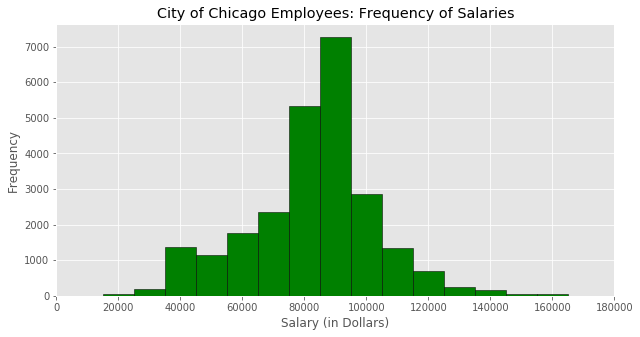

In [15]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Create bins array
bins = []
for i in range(18):
    bin = i * 10000
    bins.append(bin)
    
# Graph style
plot.style.use("ggplot")
plot.figure(figsize=(10,5))
plot.xlim([0,180000])

# Create title and lables
plot.title("City of Chicago Employees: Frequency of Salaries")
plot.xlabel("Salary (in Dollars)")
plot.ylabel("Frequency")

# Create histogram
plot.hist(salary_array, bins, align="left", color="green", edgecolor="black")
plot.show()

### Question: How many employees per department in the City of Chicago?

In [16]:
# Count the number of entries from each department
department_count = salary_DF["Department"].value_counts()
department_count

POLICE                   13061
FIRE                      4837
OEMC                      2121
STREETS & SAN             2035
WATER MGMNT               1905
AVIATION                  1414
TRANSPORTN                1242
PUBLIC LIBRARY             984
GENERAL SERVICES           964
FAMILY & SUPPORT           626
FINANCE                    564
HEALTH                     505
CITY COUNCIL               448
LAW                        392
BUILDINGS                  277
COMMUNITY DEVELOPMENT      204
BUSINESS AFFAIRS           161
COPA                       115
BOARD OF ELECTION          103
DoIT                        98
PROCUREMENT                 97
CITY CLERK                  89
MAYOR'S OFFICE              89
INSPECTOR GEN               87
ANIMAL CONTRL               80
HUMAN RESOURCES             70
CULTURAL AFFAIRS            67
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                29
TREASURER                   22
HUMAN RELATIONS             17
IPRA    

### Modify Data: Create a List of Departments and a List of Their Frequences

These two lists will be useful when plotting.

In [17]:
# Create department names list
department_names = salary_DF["Department"].value_counts().index.tolist()

# Create frequency list
department_count = salary_DF["Department"].value_counts().tolist()

# Print
print(department_names)
print(department_count)


['POLICE', 'FIRE', 'OEMC', 'STREETS & SAN', 'WATER MGMNT', 'AVIATION', 'TRANSPORTN', 'PUBLIC LIBRARY', 'GENERAL SERVICES', 'FAMILY & SUPPORT', 'FINANCE', 'HEALTH', 'CITY COUNCIL', 'LAW', 'BUILDINGS', 'COMMUNITY DEVELOPMENT', 'BUSINESS AFFAIRS', 'COPA', 'BOARD OF ELECTION', 'DoIT', 'PROCUREMENT', 'CITY CLERK', "MAYOR'S OFFICE", 'INSPECTOR GEN', 'ANIMAL CONTRL', 'HUMAN RESOURCES', 'CULTURAL AFFAIRS', 'BUDGET & MGMT', 'ADMIN HEARNG', 'DISABILITIES', 'TREASURER', 'HUMAN RELATIONS', 'IPRA', 'BOARD OF ETHICS', 'POLICE BOARD', 'LICENSE APPL COMM']
[13061, 4837, 2121, 2035, 1905, 1414, 1242, 984, 964, 626, 564, 505, 448, 392, 277, 204, 161, 115, 103, 98, 97, 89, 89, 87, 80, 70, 67, 46, 39, 29, 22, 17, 13, 8, 2, 1]


### Visualization: Pie Chart of Employees by Department

Note: This pie chart has too many slices! We will need to fix it:

<function matplotlib.pyplot.show(*args, **kw)>

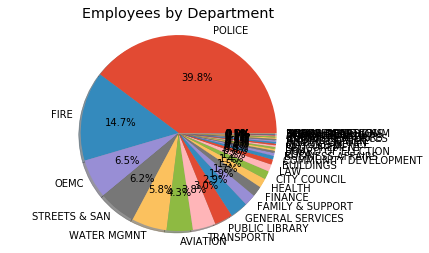

In [18]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Create labels and data array
labels = department_names
data = department_count

# Graph pie chart
plot.pie(data, labels=labels, autopct="%1.1f%%", shadow=True)
plot.title("Employees by Department")
#plot.legend(title="Legend", loc="lower left")
plot.axis("equal")
plot.show

### Modify Data: If a Department is Not In the Top 10, Lump as 'Other'

In [19]:
# Make new list of largest 10 names, add "OTHER"
shortened_names = department_names[:10]
shortened_names.append("OTHER")

# Make new list of largets 10 counts, add sum of remaining
shortened_count = department_count[:10]
remaining = sum(department_count[10:])
shortened_count.append(remaining)

# Print two lists
print(shortened_names)
print(shortened_count)


['POLICE', 'FIRE', 'OEMC', 'STREETS & SAN', 'WATER MGMNT', 'AVIATION', 'TRANSPORTN', 'PUBLIC LIBRARY', 'GENERAL SERVICES', 'FAMILY & SUPPORT', 'OTHER']
[13061, 4837, 2121, 2035, 1905, 1414, 1242, 984, 964, 626, 3623]


### Visualization: Pie Chart of Number of Employees by Department (Fixed)

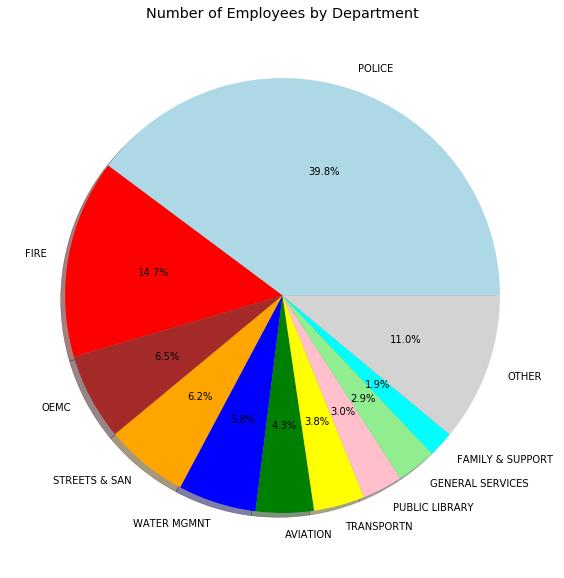

In [20]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Graph details
plot.figure(figsize=(10,10))
plot.title("Number of Employees by Department")
plot.style.use("ggplot")
colors_array = ["lightblue", "red", "brown", "orange", "blue", "green", "yellow", "pink", "lightgreen", "cyan", "lightgray"]

# Create pie chart
    # plot.pie(data array, labels array, color array, percentages, shadow)
plot.pie(shortened_count, labels=shortened_names, colors=colors_array, autopct="%1.1f%%", shadow=True)
#plot.legend(title="Legend), loc="lower_left")
plot.show()

### Question: What is the mean (average) salary in each department in the City of Chicago?

In [21]:
# Group each department
salary_DF["Annual Salary"].groupby(salary_DF["Department"]).mean()

Department
ADMIN HEARNG              78894.153846
ANIMAL CONTRL             66264.193548
AVIATION                  77335.516284
BOARD OF ELECTION         54895.572816
BOARD OF ETHICS           95061.000000
BUDGET & MGMT             93300.545455
BUILDINGS                 99095.580650
BUSINESS AFFAIRS          81305.341935
CITY CLERK                71758.034483
CITY COUNCIL              64370.362997
COMMUNITY DEVELOPMENT     88720.776119
COPA                      75993.600000
CULTURAL AFFAIRS          89197.034483
DISABILITIES              83521.285714
DoIT                      99114.122449
FAMILY & SUPPORT          79682.228571
FINANCE                   73480.580769
FIRE                      98294.440306
GENERAL SERVICES          83694.138768
HEALTH                    85291.960159
HUMAN RELATIONS           94242.352941
HUMAN RESOURCES           79579.764706
INSPECTOR GEN             81244.137931
IPRA                     102456.923077
LAW                       85967.333333
LICENSE APPL C

### Modify Data: Create a List of Departments and a List of Their Average Annual Salaries

These two lists will be useful when plotting.

In [22]:
# Array of department names sorted by the average salary
dept_names_average = salary_DF["Annual Salary"].groupby(salary_DF["Department"]).mean().index.tolist()

# Array of salaries sorted by department
dept_avg = salary_DF["Annual Salary"].groupby(salary_DF["Department"]).mean().tolist()

# Print the arrays
print(dept_names_average)
print(dept_avg)


['ADMIN HEARNG', 'ANIMAL CONTRL', 'AVIATION', 'BOARD OF ELECTION', 'BOARD OF ETHICS', 'BUDGET & MGMT', 'BUILDINGS', 'BUSINESS AFFAIRS', 'CITY CLERK', 'CITY COUNCIL', 'COMMUNITY DEVELOPMENT', 'COPA', 'CULTURAL AFFAIRS', 'DISABILITIES', 'DoIT', 'FAMILY & SUPPORT', 'FINANCE', 'FIRE', 'GENERAL SERVICES', 'HEALTH', 'HUMAN RELATIONS', 'HUMAN RESOURCES', 'INSPECTOR GEN', 'IPRA', 'LAW', 'LICENSE APPL COMM', "MAYOR'S OFFICE", 'OEMC', 'POLICE', 'POLICE BOARD', 'PROCUREMENT', 'PUBLIC LIBRARY', 'STREETS & SAN', 'TRANSPORTN', 'TREASURER', 'WATER MGMNT']
[78894.15384615384, 66264.19354838709, 77335.516284153, 54895.57281553398, 95061.0, 93300.54545454546, 99095.58064981952, 81305.34193548387, 71758.03448275862, 64370.36299711816, 88720.77611940299, 75993.6, 89197.03448275862, 83521.28571428571, 99114.12244897959, 79682.22857142857, 73480.58076923077, 98294.44030610137, 83694.13876777251, 85291.96015936256, 94242.35294117648, 79579.76470588235, 81244.13793103448, 102456.92307692308, 85967.33333333333

### Visualization: Bar Chart of Average Annual Salary by Department
#### Sorted by Departement Name

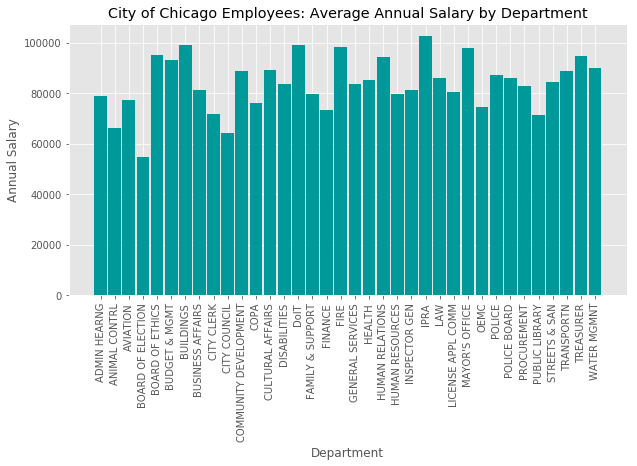

In [23]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Graph details
plot.style.use("ggplot")
plot.figure(figsize=(10,5))
plot.title("City of Chicago Employees: Average Annual Salary by Department")
plot.xlabel("Department")
plot.ylabel("Annual Salary")

length = len(dept_names_average)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, dept_names_average, rotation=90)
width = 0.9

# Bar graph
plot.bar(bar_pos, dept_avg, width, color="#009999")
plot.show()

### Modify Data: Merge Our Two Lists Into a List of Tuples, Then Sort

By sorting, we can get a nicer plot.

In [24]:
# List of tuples in the form (names, average salary)
sorted_average_list = []
for i in range(len(dept_names_average)):
    sorted_average_list.append((dept_names_average[i],dept_avg[i]))

# Sort the list in reverse
sorted_average_list.sort(key = lambda x: x[1], reverse=True)

# Print
sorted_average_list

[('IPRA', 102456.92307692308),
 ('DoIT', 99114.12244897959),
 ('BUILDINGS', 99095.58064981952),
 ('FIRE', 98294.44030610137),
 ("MAYOR'S OFFICE", 97718.24050632911),
 ('BOARD OF ETHICS', 95061.0),
 ('TREASURER', 94872.68181818182),
 ('HUMAN RELATIONS', 94242.35294117648),
 ('BUDGET & MGMT', 93300.54545454546),
 ('WATER MGMNT', 89995.80555858313),
 ('CULTURAL AFFAIRS', 89197.03448275862),
 ('TRANSPORTN', 88825.2110447761),
 ('COMMUNITY DEVELOPMENT', 88720.77611940299),
 ('POLICE', 87091.69701149425),
 ('POLICE BOARD', 86136.0),
 ('LAW', 85967.33333333333),
 ('HEALTH', 85291.96015936256),
 ('STREETS & SAN', 84404.85981308411),
 ('GENERAL SERVICES', 83694.13876777251),
 ('DISABILITIES', 83521.28571428571),
 ('PROCUREMENT', 82648.12903225806),
 ('BUSINESS AFFAIRS', 81305.34193548387),
 ('INSPECTOR GEN', 81244.13793103448),
 ('LICENSE APPL COMM', 80568.0),
 ('FAMILY & SUPPORT', 79682.22857142857),
 ('HUMAN RESOURCES', 79579.76470588235),
 ('ADMIN HEARNG', 78894.15384615384),
 ('AVIATION', 7

### Visualization: Another Bar Chart of Average Annual Salary by Department 

#### Sorted by Average Annual Salary

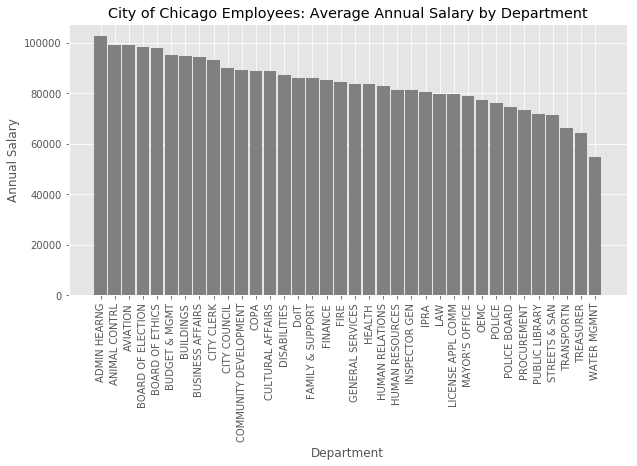

In [25]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('City of Chicago Employees: Average Annual Salary by Department')
plot.ylabel('Annual Salary')
plot.xlabel('Department')

length = len(sorted_average_list)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, dept_names_average, rotation=90)
width = 0.9

x_data = [tuple[0] for tuple in sorted_average_list]
y_data = [tuple[1] for tuple in sorted_average_list]

plot.bar(bar_pos, y_data, width, color="gray")
plot.show()


### Question: What is the total salary expenditure in each department in the City of Chicago?

In [27]:
# List of each departments total salary spending
salary_DF["Annual Salary"].groupby(salary_DF["Department"]).sum()

Department
ADMIN HEARNG             3.076872e+06
ANIMAL CONTRL            4.108380e+06
AVIATION                 4.245720e+07
BOARD OF ELECTION        5.654244e+06
BOARD OF ETHICS          7.604880e+05
BUDGET & MGMT            4.105224e+06
BUILDINGS                2.744948e+07
BUSINESS AFFAIRS         1.260233e+07
CITY CLERK               6.242949e+06
CITY COUNCIL             2.233652e+07
COMMUNITY DEVELOPMENT    1.783288e+07
COPA                     8.739264e+06
CULTURAL AFFAIRS         5.173428e+06
DISABILITIES             2.338596e+06
DoIT                     9.713184e+06
FAMILY & SUPPORT         2.509990e+07
FINANCE                  3.820990e+07
FIRE                     4.752536e+08
GENERAL SERVICES         1.765946e+07
HEALTH                   4.281656e+07
HUMAN RELATIONS          1.602120e+06
HUMAN RESOURCES          5.411424e+06
INSPECTOR GEN            7.068240e+06
IPRA                     1.331940e+06
LAW                      3.094824e+07
LICENSE APPL COMM        8.056800e+04
M

### Modify Data: Create a Sorted List of Tuples

In [28]:
# List of department names
department_names_sum = salary_DF["Annual Salary"].groupby(salary_DF["Department"]).sum().index.tolist()

# List of department total salary spending
department_sum = salary_DF["Annual Salary"].groupby(salary_DF["Department"]).sum().tolist()

# Create list a tuples in form (department name, department total salary spending)
    # 'zip' binds two parallel arrays into tuples
sorted_sum_list = list(zip(department_names_sum,department_sum))

# Sort the list by total sums, in reverse
sorted_sum_list.sort(key = lambda x: x[1], reverse=True)

# Print
sorted_sum_list

[('POLICE', 1136546646.0),
 ('FIRE', 475253618.8800001),
 ('OEMC', 60187720.79999998),
 ('PUBLIC LIBRARY', 50267580.0),
 ('HEALTH', 42816564.0),
 ('AVIATION', 42457198.44),
 ('FINANCE', 38209902.0),
 ('TRANSPORTN', 35707734.83999999),
 ('WATER MGMNT', 33028460.640000008),
 ('LAW', 30948240.0),
 ('BUILDINGS', 27449475.840000007),
 ('STREETS & SAN', 27093960.0),
 ('FAMILY & SUPPORT', 25099902.0),
 ('CITY COUNCIL', 22336515.96),
 ('COMMUNITY DEVELOPMENT', 17832876.0),
 ('GENERAL SERVICES', 17659463.28),
 ('BUSINESS AFFAIRS', 12602328.0),
 ('DoIT', 9713184.0),
 ('COPA', 8739264.0),
 ("MAYOR'S OFFICE", 7719741.0),
 ('PROCUREMENT', 7686276.0),
 ('INSPECTOR GEN', 7068240.0),
 ('CITY CLERK', 6242949.0),
 ('BOARD OF ELECTION', 5654244.0),
 ('HUMAN RESOURCES', 5411424.0),
 ('CULTURAL AFFAIRS', 5173428.0),
 ('ANIMAL CONTRL', 4108380.0),
 ('BUDGET & MGMT', 4105224.0),
 ('ADMIN HEARNG', 3076872.0),
 ('DISABILITIES', 2338596.0),
 ('TREASURER', 2087199.0),
 ('HUMAN RELATIONS', 1602120.0),
 ('IPRA', 1

### Visualization: Bar Chart of Total Annual Salary Expenditure by Department 

#### Sorted by Total Expenditure
* y-axis expressed in billions of dollars (1 x 10^9 or 1e9)

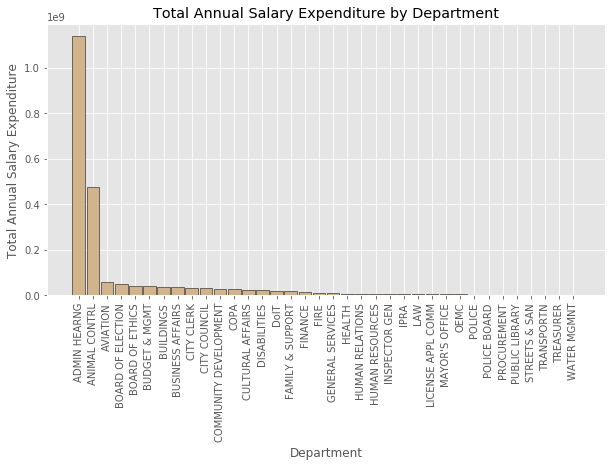

In [29]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('Total Annual Salary Expenditure by Department')
plot.ylabel('Total Annual Salary Expenditure')
plot.xlabel('Department')

length = len(sorted_sum_list)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, department_names_sum, rotation=90)
width = 0.9

# Create lists of sorted departements and total sums
x_data = [tuple[0] for tuple in sorted_sum_list]
y_data = [tuple[1] for tuple in sorted_sum_list]

# Bar graph
plot.bar(bar_pos, y_data, width, color="tan", edgecolor="black")

plot.show()

# Open Data Example #2: School District Revenue and Enrollment

_Source for Data Set:_ The United States Census Bureau (via data.gov)

_URL for Data Set:_ https://www.census.gov/data/tables/2015/econ/school-finances/secondary-education-finance.html

_Note:_ You should get this dataset from Schoology, not the URL. The Schoology file has been cleaned to remove outliers (for example, districts with 0 students or 0 revenue).

_Description of Data Set:_ This data has school enrollment versus total revenue for every school district in the United States in 2015 (the most recent data available).

_File Format for Data Set:_ CSV file (Comma Separated Values)

_Age of Data Set:_ 5/11/2017, accessed 1/28/2018

Read in the data:

In [32]:
# Import pandas
import pandas as pd

# Read the csv file (comma separated values)
enrollment_DF = pd.read_csv("Enrollment Revenue 2019.csv")

# Print last thre entries
enrollment_DF[-3:]

,District,Total Enrollment,Total Revenue
13271,ZIONSVILLE COMMUNITY SCHOOLS,6428,83094
13272,ZUMBROTA-MAZEPPA SCH DISTRICT 2805,1152,14074
13273,ZUNI SCHOOL DISTRICT,1390,20243


Now plot:

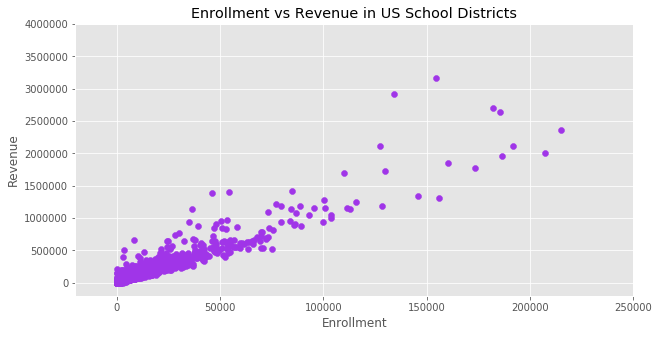

In [33]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

#enrollmentDF.plot(kind='scatter', x='Enrollment', y='Total Revenue');

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('Enrollment vs Revenue in US School Districts')
plot.ylabel('Revenue')
plot.xlabel('Enrollment')

x_data = enrollment_DF["Total Enrollment"]
y_data = enrollment_DF["Total Revenue"]
plot.xlim([-20000,250000])
plot.ylim([-200000,4000000])

# Scatter plot
plot.scatter(x_data, y_data, color="#A035E8")

plot.show()

### Question: What seems to be the relationship between the number of students enrolled in a school district and the revenue of the district?

### Linear Regression
* Modeling the relationship between two variables using a linear equation (straight line)
* Equation for a line in slope-intercept form:
    * y = mx + b
        * m = slope
        * b = y-intercept

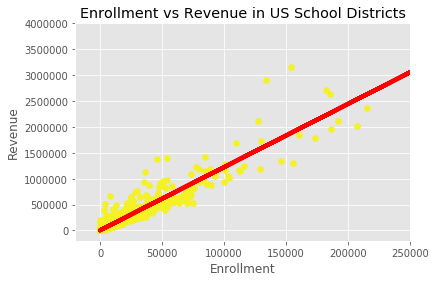

In [34]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.title('Enrollment vs Revenue in US School Districts')
plot.ylabel('Revenue')
plot.xlabel('Enrollment')

x_data = enrollment_DF["Total Enrollment"]
y_data = enrollment_DF["Total Revenue"]
plot.xlim([-20000,250000])
plot.ylim([-200000,4000000])

# Use np.polyfit to calculate the slope and y-intercept for the 'line of best fit'
m, b = np.polyfit(x_data, y_data, 1)

# Scatter Plot
    # plot.plot(variable, equation, line width, color)
plot.plot(x_data, m*x_data + b, linewidth=4, color="red")
plot.scatter(x_data, y_data, color="#F4F124")

plot.show()

### Question: Explain the meaning of the code in the cell below. Then run it and interpret the resulting output.

In [35]:
x0 = 125000
print(m*x0 + b)

1528065.6951490715


In [36]:
# This is the median revenue a school district gets